# Udacity Data Wrangling Project for WeRateDogs

### by Adaobi Onyeakagbu

## Content
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Store, Analyze, and Visualize](#storing)

<a id='intro'></a>
## Introduction

This project involves wrangling, analyzing and visualizing the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

In [271]:
# First import all the libraries needed for the project

import numpy as np
import pandas as pd
import tweepy
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
%matplotlib inline

<a id='gather'></a>
## Gather

This section involves the processes used for gathering the data that would be used for the wrangling and analysis. This includes:
- The WeRateDogs Twitter archive file which was a csv file downloaded manually
- Tweet image predictions file which is hosted on Udacity servers and downloaded programmatically using the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- JSON data which includes querying the Twitter API to get each tweet's JSON data using Python's Tweepy library and storing them in the tweet_json.txt file.

- **Archive file**

In [4]:
#Archive file
df_archive_file = pd.read_csv('twitter-archive-enhanced.csv')
df_archive_file.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- **Image Predictions**

In [6]:
#downloading TSV file
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')


In [7]:
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)
    
image_pred = pd.read_csv('image-predictions.tsv', sep='\t' )

- **API and JSON data**

In [8]:
# querying Twitter API for data, keys hidden for privacy
consumer_key = '************'
consumer_secret = '**********************************'
access_token = '*****************************'
access_secret = '***************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [9]:
with open('tweet_json.txt', 'w') as outfile: 
    for tweet_id in df_archive_file['tweet_id']:
        try:
            tweet = api.get_status(tweet_id)
            json.dump(tweet._json, outfile) #dump JSON data for each tweet into text file
            outfile.write("\n")
            
        # catch exception for deleted tweets
        except:  
            print('ERROR: Error on tweet id {}'.format(tweet_id))
            e = os.sys.exc_info()[0]

ERROR: Error on tweet id 888202515573088257
ERROR: Error on tweet id 873697596434513921
ERROR: Error on tweet id 872668790621863937
ERROR: Error on tweet id 872261713294495745
ERROR: Error on tweet id 869988702071779329
ERROR: Error on tweet id 866816280283807744
ERROR: Error on tweet id 861769973181624320
ERROR: Error on tweet id 856602993587888130
ERROR: Error on tweet id 851953902622658560
ERROR: Error on tweet id 845459076796616705
ERROR: Error on tweet id 844704788403113984
ERROR: Error on tweet id 842892208864923648
ERROR: Error on tweet id 837366284874571778
ERROR: Error on tweet id 837012587749474308
ERROR: Error on tweet id 829374341691346946
ERROR: Error on tweet id 827228250799742977
ERROR: Error on tweet id 812747805718642688
ERROR: Error on tweet id 802247111496568832
ERROR: Error on tweet id 779123168116150273
ERROR: Error on tweet id 775096608509886464
ERROR: Error on tweet id 771004394259247104
ERROR: Error on tweet id 770743923962707968
ERROR: Error on tweet id 7595668

In [10]:
# Specifying information of interest from JSON dictionaries to put in dataframe
elements_to_save = ['id', 'favorite_count', 'retweet_count']
data = []

# Read JSON file line by line and convert to dict
with open('tweet_json.txt', 'r') as readfile:
    tweet_json = readfile.readline()
    
    # Read line by line into DataFrame
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data_row = dict((k, tweet_dict[k]) for k in elements_to_save)
        data.append(data_row)
        
        tweet_json = readfile.readline()
        
            
# create dataframe from dict    
tweet_json_df = pd.DataFrame.from_dict(data)

<a id='assess'></a>
## Assess

This section includes visually and programmatically assessing the data that has been gathered, for further information.

- **WeRateDogs Tweet Archive:**

In [12]:
df_archive_file

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
df_archive_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [53]:
df_archive_file.loc[df_archive_file['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [50]:
df_archive_file['tweet_id'].duplicated().sum()

0

In [19]:
df_archive_file.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_archive_file.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [34]:
## investigate interesting numerator values

numerators = [3, 4, 1, 2, 420, 0, 75, 165, 666, 960, 1776]
for num in numerators:
    pd.set_option('display.max_colwidth', -1)
    print(df_archive_file['text'].loc[df_archive_file.rating_numerator==num])

765     This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
1189    This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl        
1249    What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz   
1314    This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu      
1406    This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7 
1478    Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx 
1601    This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 m

In [267]:
## investigate decimal numerator ratings (9.75)
pd.set_option('display.max_colwidth', -1)
print(df_archive_file[df_archive_file['text'].str.contains(pat= r"(\d+\.\d*\/\d+)")]['text'])

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1689    I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                       
1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                    

In [24]:
df_archive_file.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [59]:
## investigate text for interesting denominator values and get their tweet ids

denominators = [11, 50, 20, 2, 80, 16, 40, 70, 15, 90, 110, 120, 130, 150, 170, 7, 0]
for den in denominators:
    pd.set_option('display.max_colwidth', -1)
    print(df_archive_file[['text','tweet_id']].loc[df_archive_file.rating_denominator==den])

                                                                                                                                              text  \
784   RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…   
1068  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1662  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5    

                tweet_id  
784   775096608509886464  
1068  740373189193256964  
1662  682962037429899265  
                                                                                                                                                    text  \
1202  This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq            

In [ ]:
# tweet IDs of incorrect denominator ratings
# 740373189193256964 14/10
# 682962037429899265 11/10
# 716439118184652801 11/10
# 722974582966214656 13/10
# 666287406224695296 9/10

# 709198395643068416 45/50
# 704054845121142784 60/50
# 710658690886586372  80/80
# 675853064436391936 88/80
# 697463031882764288 44/40
# 820690176645140481 84/70
# 713900603437621249 99/90
# 684222868335505415 121/110
# 677716515794329600 144/120
# 684225744407494656 143/130
# 758467244762497024 165/150
# 731156023742988288 204/170

# 810984652412424192 delete
# 835246439529840640 delete
# 832088576586297345 delete
# 682808988178739200 delete
# 686035780142297088 delete

In [65]:
df_archive_file.name.value_counts()


None           745
a              55 
Charlie        12 
Lucy           11 
Oliver         11 
Cooper         11 
Lola           10 
Penny          10 
Tucker         10 
Bo             9  
Winston        9  
the            8  
Sadie          8  
Toby           7  
Bailey         7  
Daisy          7  
an             7  
Buddy          7  
Milo           6  
Jack           6  
Scout          6  
Stanley        6  
Leo            6  
Dave           6  
Jax            6  
Oscar          6  
Koda           6  
Rusty          6  
Bella          6  
Sammy          5  
              ..  
Ebby           1  
space          1  
Jessiga        1  
Mac            1  
Lilah          1  
Alfy           1  
Shiloh         1  
Jaycob         1  
Sid            1  
Barry          1  
Ivar           1  
Jeffrie        1  
Rizzo          1  
Raphael        1  
Remy           1  
Odin           1  
Scruffers      1  
infuriating    1  
Lulu           1  
Crouton        1  
Brady          1  
Malikai     

In [61]:
df_archive_file.doggo.value_counts()


None     2259
doggo    97  
Name: doggo, dtype: int64

In [62]:
df_archive_file.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [63]:
df_archive_file.pupper.value_counts()


None      2099
pupper    257 
Name: pupper, dtype: int64

In [64]:
df_archive_file.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

- **Tweet Image Predictions:**

In [8]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [54]:
image_pred.tweet_id.duplicated().sum(), image_pred.jpg_url.duplicated().sum()

(0, 66)

In [59]:
image_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
cocker_spaniel               30 
malamute                     30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
German_shepherd              20 
Staffordshire_bullterrier    20 
Siberian_husky               20 
Cardigan                     19 
web_site                     19 
teddy                        18 
beagle                       18 
Maltese_dog                  18 
Eskimo_dog                   18 
Shetland_sheepdog            18 
Lakeland_terrier             17 
Shih-Tzu                     17 
Rottweiler                   17 
kuvasz                       16 
Italian_greyhound            16 
          

In [60]:
image_pred.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
Chesapeake_Bay_retriever          41 
French_bulldog                    41 
toy_poodle                        37 
cocker_spaniel                    34 
Siberian_husky                    33 
miniature_poodle                  33 
beagle                            28 
Pembroke                          27 
collie                            27 
Eskimo_dog                        27 
kuvasz                            26 
Italian_greyhound                 22 
Pekinese                          21 
American_Staffordshire_terrier    21 
chow                              20 
miniature_pinscher                20 
Samoyed                           20 
malinois                          20 
toy_terrier                       20 
Norwegian_elkhound                19 
Boston_bull                       19 
Staffordshir

In [58]:
image_pred.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [67]:
## Investigate actual dog breeds
print(image_pred.p1_dog.value_counts())
print(image_pred.p2_dog.value_counts())
print(image_pred.p3_dog.value_counts())

True     1532
False    543 
Name: p1_dog, dtype: int64
True     1553
False    522 
Name: p2_dog, dtype: int64
True     1499
False    576 
Name: p3_dog, dtype: int64


- **JSON tweet data:**

In [11]:
tweet_json_df

,favorite_count,id,retweet_count
0,36270,892420643555336193,7724
1,31276,892177421306343426,5708
2,23543,891815181378084864,3782
3,39565,891689557279858688,7877
4,37786,891327558926688256,8495
5,19033,891087950875897856,2846
6,11080,890971913173991426,1853
7,61115,890729181411237888,17230
8,26191,890609185150312448,3919
9,29928,890240255349198849,6706


In [69]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
id                2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


<a id='quality'></a>
### Quality Issues

#### Archive Twitter Data
1. Archive data contains some retweets
2. Expanded URLs missing for 50+ entries 
3. Errors in rating entry (denominators should be 10 or not rating at all or another value was taken or error in ratings with decimals)
4. Missing data for dog stage classification
5. Incorrect names of dogs
6. Wrong datatype for Timestamp column, which also needs to be split into day, month and year
7. Unnecessary columns for analysis

#### Image Predictions
8. Duplicate images
9. Some incorrect dog breeds from prediction (e.g the)
10. Unnecessary columns for analysis

<a id='tidiness'></a>
### Tidiness Issues

1. Columns for dog stage classification are separated instead of in one
2. The three tables should be joined to one on tweet id

## Clean

In [224]:
archive = df_archive_file.copy()
image_prediction = image_pred.copy()
tweet_json = tweet_json_df.copy()

#### 1. Archive data contains some retweets
We are only interested in original tweets and not retweets so we locate all retweets and remove them

#### Code

In [225]:
retweets = pd.notnull(archive['retweeted_status_user_id'])
archive = archive[~retweets]

#### Test

In [226]:
##check rows with retweets
archive.loc[retweets]
## or using status id
print(sum(archive.retweeted_status_user_id.value_counts()))

0


#### 2. Expanded URLs missing for 50+ entries in Archive data
Get expanded URL by adding the tweet id to the Twitter status link

#### Code

In [227]:
def expanded_urls(row):
    if pd.isnull(row['expanded_urls']):
        tweet_id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row
    else:
        return row

In [228]:

archive = archive.apply(expanded_urls, axis=1)


#### Test

In [229]:
archive.loc[archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 3. Errors in rating entry in Archive data
Definition: Correct rating entries with decimals were erronously entered, where another value was taken and those that were not ratings at all. Also, denominators should be 10 so correct ratings with multiple dogs in a picture.

#### Code

In [268]:
#to correct ratings with decimals first change datatype from int to float
archive['rating_numerator'] = archive['rating_numerator'].astype(float)
archive['rating_denominator'] = archive['rating_denominator'].astype(float)
##get tweet ids of ratings with decimals
with pd.option_context('max_colwidth', 200):
    display(archive[archive['text'].str.contains(pat= r"(\d+\.\d*\/\d+)")][['tweet_id', 'text']])

,tweet_id,text
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948"
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


In [231]:
archive.loc[(archive.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive.loc[(archive.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive.loc[(archive.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive.loc[(archive.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive.loc[(archive.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [232]:
#to correct incorrect ratings
#740373189193256964 14/10
archive.loc[(archive.tweet_id == 740373189193256964), 'rating_numerator'], archive.loc[(archive.tweet_id == 740373189193256964), 'rating_denominator'] = 14, 10
#682962037429899265 11/10
archive.loc[(archive.tweet_id == 682962037429899265), 'rating_numerator'],archive.loc[(archive.tweet_id == 682962037429899265), 'rating_denominator'] = 11,10
#716439118184652801 11/10
archive.loc[(archive.tweet_id == 716439118184652801), 'rating_numerator'], archive.loc[(archive.tweet_id == 716439118184652801), 'rating_denominator'] = 11, 10
#722974582966214656 13/10
archive.loc[(archive.tweet_id == 722974582966214656), 'rating_numerator'], archive.loc[(archive.tweet_id == 722974582966214656), 'rating_denominator'] = 13, 10
#666287406224695296 9/10
archive.loc[(archive.tweet_id == 666287406224695296), 'rating_numerator'], archive.loc[(archive.tweet_id == 666287406224695296), 'rating_denominator'] = 9, 10

#drop non_ratings
non_ratings= [835246439529840640, 835246439529840640, 832088576586297345, 682808988178739200, 686035780142297088, 835246439529840640]
for rat in non_ratings:
    archive = archive[archive.tweet_id != rat]

In [233]:
#to correct multiple dog ratings

# def multiple(row):
#     multiple_dogs= [709198395643068416, 704054845121142784, 710658690886586372, 675853064436391936, 697463031882764288, 820690176645140481, 713900603437621249, 684222868335505415, 677716515794329600, 684225744407494656, 758467244762497024, 731156023742988288] 
#     for _ in multiple_dogs:
#         if row['tweet_id']== _:
#             row['rating_numerator'] = (row['rating_numerator'] / row['rating_denominator'])*10
#             row['rating_denominator'] = 10
#             return row
#         else:
#             return row
# archive = archive.apply(multiple, axis=1, inplace= True)

archive['actual_rating'] = 10* archive['rating_numerator'] / archive['rating_denominator'].astype(float)

        

#### Test

In [269]:
with pd.option_context('max_colwidth', 200):
    display(archive[archive['text'].str.contains(pat= r"(\d+\.\d*\/\d+)")]['rating_numerator'])

45      13.50
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

In [235]:
archive.actual_rating.value_counts()

12.000000      504
10.000000      443
11.000000      433
13.000000      308
9.000000       157
8.000000       98 
7.000000       53 
14.000000      44 
5.000000       34 
6.000000       32 
3.000000       19 
4.000000       15 
2.000000       9  
1.000000       7  
420.000000     2  
0.000000       2  
9.750000       1  
13.500000      1  
17.000000      1  
666.000000     1  
11.260000      1  
15.000000      1  
34.285714      1  
1776.000000    1  
11.270000      1  
9.500000       1  
182.000000     1  
Name: actual_rating, dtype: int64

#### 4. Missing data for dog stage classification in Archive data
Definition: Locate text with pupper and add to column.

**Code**

In [236]:
def puppers(row):

    if 'pupper' in row['text']:
        row['pupper'] = 'pupper'
    elif 'puppers' in row['text']:
        row['pupper'] = 'pupper'
   
    return row

# Save dataframe with new information
archive = archive.apply(puppers, axis=1)

**Test**

In [237]:
archive['pupper'].value_counts()

None      1913
pupper    258 
Name: pupper, dtype: int64

#### 5. Incorrect names of dogs in Archive data
Definition: Correct names stored as "a", "the" and "an" to the actual names, or no name.

**Code**

In [238]:
def corr_name(row):
    if (row['name'] == 'a' or row['name'] == 'the' or row['name'] == 'an'):    
        tweet = row['text']
        words = tweet.split() # split words
        # target names after named and name is
        if 'named' in words:
            position = words.index('named') + 1
            name = words[position]
        elif 'name is' in tweet:
            position = words.index('name') + 2
            name = words[position]
        else:
            name = 'None' #default for no name

        row['name'] = name.replace('.','')
    
    return row
    

archive = archive.apply(corr_name, axis=1)

**Test**

In [239]:
archive['name'].value_counts()

None         724
Lucy         11 
Charlie      11 
Cooper       10 
Oliver       10 
Tucker       9  
Penny        9  
Sadie        8  
Lola         8  
Winston      8  
Daisy        7  
Toby         7  
Koda         6  
Jax          6  
Bo           6  
Bailey       6  
Bella        6  
Stanley      6  
Oscar        6  
Louis        5  
Buddy        5  
Bentley      5  
Dave         5  
Chester      5  
Scout        5  
Milo         5  
Rusty        5  
Leo          5  
Boomer       4  
Clark        4  
            ..  
Brownie      1  
Jaycob       1  
Klein        1  
Ito          1  
Dobby        1  
Stefan       1  
Hamrick      1  
Howie        1  
Ziva         1  
Skittles     1  
Horace       1  
Emanuel      1  
Kollin       1  
Clarq        1  
Boston       1  
Jangle       1  
Sora         1  
Pilot        1  
Bookstore    1  
Thor         1  
Rover        1  
Bradlay      1  
Chase        1  
Willow       1  
Freddery     1  
Colin        1  
Genevieve    1  
Filup        1

#### 6. Archive data: Wrong datatype for Timestamp column, which also needs to be split into day, month and year
Definition: Change Timestamp column to timedate and divide into three columns

**Code**

In [240]:
archive.timestamp= pd.to_datetime(archive.timestamp) #changing to datetime datatype
archive['Year'] = archive['timestamp'].dt.year
archive['Month'] = archive['timestamp'].dt.month
archive['Day'] = archive['timestamp'].dt.day

**Test**

In [241]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,actual_rating,Year,Month,Day
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10.0,Phineas,None,None,None,None,13.0,2017,8,1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,10.0,Tilly,None,None,None,None,13.0,2017,8,1


#### 7. Unnecessary columns for analysis
Definition: Drop columns that are not necessary for analysis

**Code**

In [242]:
archive = archive.drop(['timestamp', 'source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 1)


**Test**

In [243]:
archive.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,actual_rating,Year,Month,Day
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None,13.0,2017,8,1
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None,13.0,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None,12.0,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None,13.0,2017,7,30
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None,12.0,2017,7,29


#### 8. Image prediction data: Duplicate images 
Definition: Drop rows with duplicate images

**Code**

In [244]:
image_prediction = image_prediction.drop_duplicates(subset=['jpg_url'], keep='last')


**Test**

In [245]:
image_prediction.jpg_url.duplicated().sum()

0

#### 9. Some incorrect dog breeds from prediction (e.g the) in Image prediction data
Definition: Standardise the p1, p2 and p3 values by changing to lower case and then store the dog breed for each dog only if its highest prediction is true

**Code**

In [246]:
image_prediction['p1'] = image_prediction['p1'].str.lower()
image_prediction['p2'] = image_prediction['p2'].str.lower()
image_prediction['p3'] = image_prediction['p3'].str.lower()

In [247]:
breed = []
confidence = []
    
def dog_breed(row):
    
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('error')
        confidence.append('error')

In [248]:
#applying function
image_prediction.apply(dog_breed, axis=1)
image_prediction['predicted_breed'] = breed
image_prediction['confidence'] = confidence
#drop rows with prediction error
image_prediction = image_prediction[image_prediction['predicted_breed'] != 'error']

**Test**

In [249]:
image_prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted_breed,confidence
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,labrador_retriever,0.317365,True,tibetan_mastiff,0.01226,True,golden_retriever,0.628312


#### 10. Unnecessary Columns for analysis in Image prediction data
Definition: Drop columns that will not be used in the analysis

**Code**

In [250]:
image_prediction = image_prediction.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)


**Test**

In [251]:
image_prediction.head()

,tweet_id,jpg_url,img_num,predicted_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


#### 1. Tidiness issues: Columns for dog stage classification are separated instead of in one in Archive data
Definition: Combine the 4 columns of dog stage classification into one

**Code**

In [252]:
archive['dog_stage'] = 'None' #create new column

# Use nested if function to store values into dog stage column
def get_stage(row):
    dog_stage = []
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
    elif (row['doggo'] == 'None' and row['floofer'] == 'None' and row['pupper'] == 'None' and row['puppo'] == 'None'):
        row['dog_stage'] = 'None'
    else: 
        row['dog_stage'] = ','.join(dog_stage) # join values in the list for multiple stages

    return row

# Apply function and drop 'doggo', 'floofer', 'pupper' and 'puppo' columns
archive = archive.apply(get_stage, axis=1)
archive = archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test**

In [253]:
archive.dog_stage.value_counts()

None             1828
pupper           248 
doggo            75  
doggo,pupper     10  
floofer          9   
doggo,floofer    1   
Name: dog_stage, dtype: int64

#### 2. Tidiness issues: The three tables should be joined to one on tweet id
Definition: Combine the 3 tables with the tweet id to get comprehensive table for tweets and drop rows that do not have images and JSON data

In [254]:
incomplete_df = pd.merge(archive, image_prediction, how = 'left', on = ['tweet_id'])
incomplete_df = incomplete_df[incomplete_df['jpg_url'].notnull()]

#change column name in JSON data to tweet_id so it can be in sync
tweet_json.rename(columns = {'id':'tweet_id'}, inplace = True)
final_df = pd.merge(incomplete_df, tweet_json, how = 'left', on = ['tweet_id'])

**Test**

In [256]:
final_df.sample(5)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,actual_rating,Year,Month,Day,dog_stage,jpg_url,img_num,predicted_breed,confidence,favorite_count,retweet_count
1122,682638830361513985,I have no words. Just a magnificent pup. 12/10 https://t.co/viwWHZgX8j,"https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1,https://twitter.com/dog_rates/status/682638830361513985/photo/1",12.0,10.0,None,12.0,2015,12,31,None,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1.0,english_springer,0.440781,2068.0,597.0
341,810284430598270976,This is Phil. He's a father. A very good father too. 13/10 everybody loves Phil https://t.co/9p6ECXJMMu,"https://twitter.com/dog_rates/status/810284430598270976/photo/1,https://twitter.com/dog_rates/status/810284430598270976/photo/1",13.0,10.0,Phil,13.0,2016,12,18,None,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1.0,malamute,0.620768,36029.0,11569.0
61,877201837425926144,This is Nelly. He graduated with his dogtorate today. Wants to know if you're proud of him. 12/10 would give congratulatory boop https://t.co/4g4cfj3P4Y,"https://twitter.com/dog_rates/status/877201837425926144/photo/1,https://twitter.com/dog_rates/status/877201837425926144/photo/1",12.0,10.0,Nelly,12.0,2017,6,20,None,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1.0,pembroke,0.93112,25506.0,5121.0
1076,685663452032069632,Meet Brooks. He's confused by the almighty ball of tennis. 12/10 \n\n(vid by @PDolan37) https://t.co/AcVWe39nmM,https://twitter.com/dog_rates/status/685663452032069632/video/1,12.0,10.0,Brooks,12.0,2016,1,9,None,https://pbs.twimg.com/ext_tw_video_thumb/685663358637486080/pu/img/3cXSHFZAgJQ_dDCf.jpg,1.0,chesapeake_bay_retriever,0.171174,3234.0,1456.0
1319,674014384960745472,Say hello to Aiden. His eyes are magical. Loves his little Guy Fieri friend. Sneaky tongue slip. 11/10 would caress https://t.co/Ac37LOe3xD,https://twitter.com/dog_rates/status/674014384960745472/photo/1,11.0,10.0,Aiden,11.0,2015,12,7,None,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1.0,pembroke,0.74232,1511.0,611.0


<a id='storing'></a>
## Storing, Analysing and Visualising data

### Storing: 
This data was stored in a csv file as well as an SQLite database

In [257]:
final_df.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [258]:
#get SQLAlchemy Engine and empty bestofrt database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///bestofrt.db')

final_df.to_sql('twitter_archive_master', engine, index=False)


In [ ]:
#df = pd.read_sql('SELECT * FROM twitter_archive_master', engine)

### Analysis and Visualization

In [270]:
twitter_archive= pd.read_csv('twitter_archive_master.csv')
twitter_archive.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,actual_rating,Year,Month,Day,dog_stage,jpg_url,img_num,predicted_breed,confidence,favorite_count,retweet_count
0,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,13.0,2017,8,1,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,31276.0,5708.0
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,12.0,2017,7,31,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,23543.0,3782.0
2,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,13.0,2017,7,30,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador_retriever,0.168086,39565.0,7877.0
3,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,12.0,2017,7,29,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,37786.0,8495.0
4,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,None,13.0,2017,7,29,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,19033.0,2846.0


#### Insight 1: Popularity of dog breeds
What dogs are entered most for ratings, and what dogs get the highest average ratings?

First, we investigate the most common dogs rated in the archive.

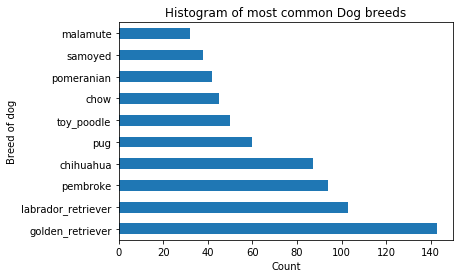

In [301]:
breed_no = twitter_archive.sort_values(by ='predicted_breed', ascending=False)
breed_no.predicted_breed.value_counts()[:10].plot(kind='barh')
plt.title('Histogram of most common Dog breeds')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

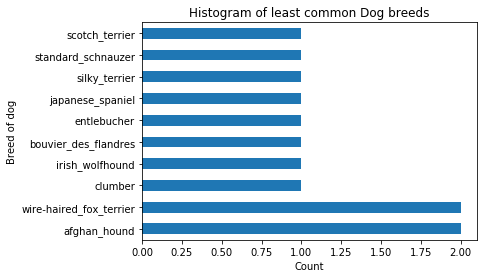

In [304]:
breed_no.predicted_breed.value_counts()[-10:].plot(kind='barh')
plt.title('Histogram of least common Dog breeds')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

From the plot above we can see that the most common dog that WeRateDogs gets to rate is the golden retriever. Next, I want to investigate the popularity of dog breeds by the average retweet and favourite count.

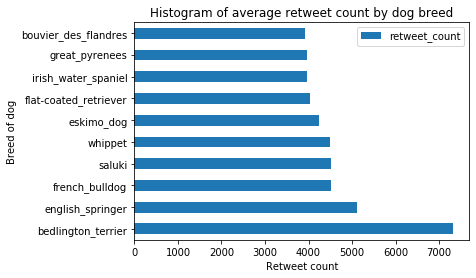

In [291]:
retweet_no= twitter_archive[['retweet_count', 'predicted_breed']]
retweet_no= retweet_no.groupby(['predicted_breed']).mean()
retweet_no.sort_values('retweet_count',ascending=False)[:10].plot(kind='barh')
plt.title('Histogram of average retweet count by dog breed')
plt.xlabel('Retweet count')
plt.ylabel('Breed of dog');

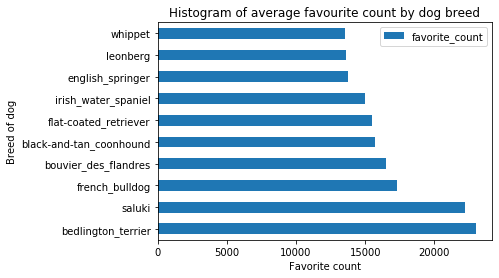

In [293]:
fave_no= twitter_archive[['favorite_count', 'predicted_breed']]
fave_no= fave_no.groupby(['predicted_breed']).mean()
fave_no.sort_values('favorite_count',ascending=False)[:10].plot(kind='barh')
plt.title('Histogram of average favourite count by dog breed')
plt.xlabel('Favorite count')
plt.ylabel('Breed of dog');

This shows that the Bedlington terrier is very popular among the audience of WeRateDogs as they have the most average retweets and favourites, even though that breed isn't the most common to be rated by the account.

Next we investigate the breeds that have the highest and lowest ratings.

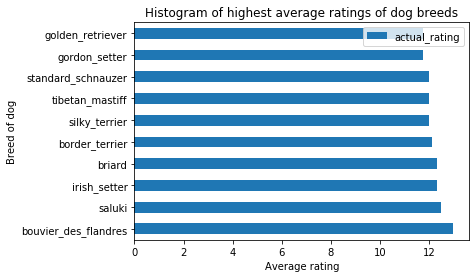

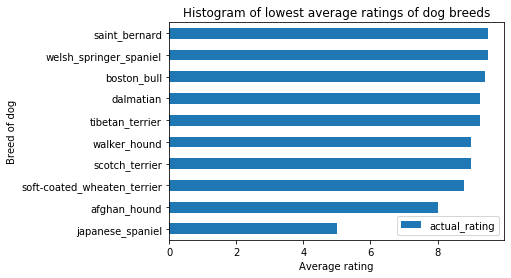

In [296]:
rate_avg= twitter_archive[['actual_rating', 'predicted_breed']]
rate_avg= rate_avg.groupby(['predicted_breed']).mean()
rate_avg.sort_values('actual_rating',ascending=False)[:10].plot(kind='barh')
plt.title('Histogram of highest average ratings of dog breeds')
plt.xlabel('Average rating')
plt.ylabel('Breed of dog');

rate_avg= twitter_archive[['actual_rating', 'predicted_breed']]
rate_avg= rate_avg.groupby(['predicted_breed']).mean()
rate_avg.sort_values('actual_rating',ascending=True)[:10].plot(kind='barh')
plt.title('Histogram of lowest average ratings of dog breeds')
plt.xlabel('Average rating')
plt.ylabel('Breed of dog');

From the visualisation above, Bouvier des Flandres breed gets a higher rating on the average from the WeRateDogs account, very likely because it is one of the least common dogs and doesn't have as many ratings. On the other hand, Japanese Spaniel seems to not be a favourite of the WeRateDogs handlers as it has an average rating of about 5 for the one time it was rated.

#### Insight 2: Relationship between ratings, retweets and Favorites
Does rating determine retweet and favorite count?

To see the relationship between ratings and the retweet count, we do a scatter plot. In addition to this, I have implemented a simple linear regression to see if the model can predict the rating a picture can get from the amount of retweets it gets.

In [ ]:
from sklearn import linear_model

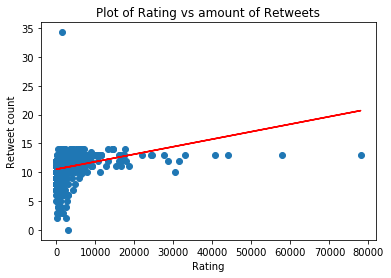

In [335]:
##Rating vs Retweets
reg_df= twitter_archive[['actual_rating', 'retweet_count']].dropna()
y1 = reg_df['actual_rating']
X1 = reg_df['retweet_count']
X1 = np.array(X1).reshape(-1, 1)


lm = linear_model.LinearRegression()
model1 = lm.fit(X1,y1)
predictions1 = lm.predict(X1)
plt.scatter(X1, y1)
plt.plot(X1, predictions1, color= "r")
plt.ylabel('Rating')
plt.xlabel('Retweet count')
plt.title('Plot of amount of Retweets vs Rating')
plt.show();

Next, we do the same for the relationship between rating and favourite count.

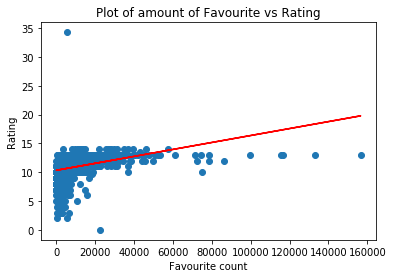

In [336]:
##Rating vs Favourite
reg_fave_df= twitter_archive[['actual_rating', 'favorite_count']].dropna()
y2 = reg_fave_df['actual_rating']
X2 = reg_fave_df['favorite_count']
X2 = np.array(X2).reshape(-1, 1)


lm = linear_model.LinearRegression()
model2 = lm.fit(X2,y2)
predictions2 = lm.predict(X2)
plt.scatter(X2, y2)
plt.plot(X2, predictions2, color= "r")
plt.ylabel('Rating')
plt.xlabel('Favourite count')
plt.title('Plot of amount of Favourite vs Rating')
plt.show();

From the plots above, we can see that the highest ratings do not receive the highest likes or retweets. The relationship between ratings and favourites and r/ship between ratings and retweets are obviously not very linear. Another model could use both favourite and retweet count as features to get a more accurate prediction of ratings.

#### Insight 3: Popularity of dog stages
What dog stages are the most common and get the highest rating? What dog stages get the highest retweets and likes?

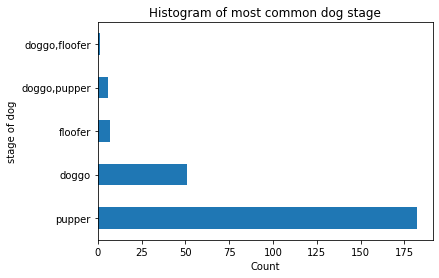

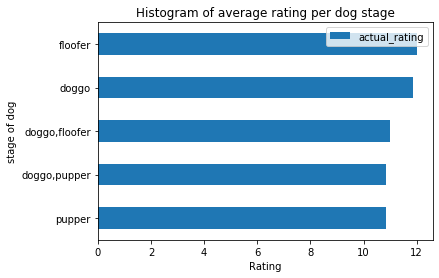

In [341]:
dog_stage_only = twitter_archive[twitter_archive['dog_stage'] != 'None']
dog_stage_only.dog_stage.value_counts().plot(kind='barh')
plt.title('Histogram of most common dog stage')
plt.xlabel('Count')
plt.ylabel('stage of dog');

dog_stage_rating=dog_stage_only[['actual_rating', 'dog_stage']]
dog_stage_rating.groupby(['dog_stage']).mean().sort_values('actual_rating').plot(kind='barh')
plt.title('Histogram of average rating per dog stage')
plt.xlabel('Rating')
plt.ylabel('stage of dog');
# retweet_no= twitter_archive[['retweet_count', 'predicted_breed']]
# retweet_no= retweet_no.groupby(['predicted_breed']).mean()
# retweet_no.sort_values('retweet_count',ascending=False)[:10].plot(kind='barh')

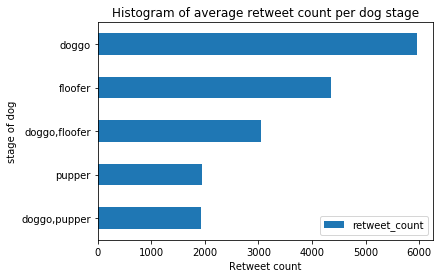

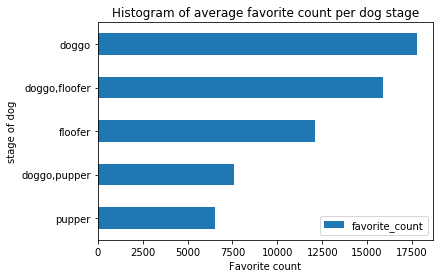

In [342]:
dog_stage_rts=dog_stage_only[['retweet_count', 'dog_stage']]
dog_stage_rts.groupby(['dog_stage']).mean().sort_values('retweet_count').plot(kind='barh')
plt.title('Histogram of average retweet count per dog stage')
plt.xlabel('Retweet count')
plt.ylabel('stage of dog');

dog_stage_fave=dog_stage_only[['favorite_count', 'dog_stage']]
dog_stage_fave.groupby(['dog_stage']).mean().sort_values('favorite_count').plot(kind='barh')
plt.title('Histogram of average favorite count per dog stage')
plt.xlabel('Favorite count')
plt.ylabel('stage of dog');

From the plots above, Pupper is the most common dog breed, but it has the least average rating and least amount of retweets and favourites. Floofer on the other hand is not as common, but has the highest average rating. Doggo seems to be very popular with the audience of WeRateDogs as it has the highest average retweet and favourite count, and it also gets good ratings.

#### Insight 4: Increase in Engagement
How has engagement changed over the years?

In [353]:
year_change= twitter_archive[['Year', 'retweet_count', 'favorite_count']].groupby(['Year']).mean()
year_change

,retweet_count,favorite_count
Year,,
2015,858.730159,2147.575397
2016,2100.818069,6447.789604
2017,5030.603896,21716.928571


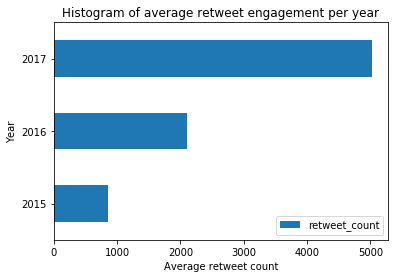

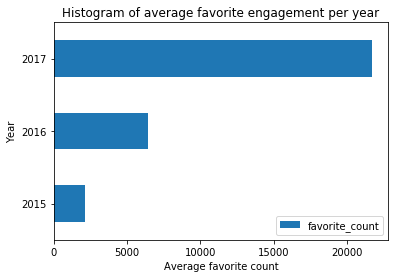

In [350]:
rt_year_df=twitter_archive[['Year', 'retweet_count']]
rt_year_df.groupby(['Year']).mean().plot(kind='barh')
plt.title('Histogram of average retweet engagement per year')
plt.xlabel('Average retweet count')
plt.ylabel('Year');

fave_year_df=twitter_archive[['Year', 'favorite_count']]
fave_year_df.groupby(['Year']).mean().plot(kind='barh')
plt.title('Histogram of average favorite engagement per year')
plt.xlabel('Average favorite count')
plt.ylabel('Year');

In [358]:
rt_change1=((year_change.iloc[1,0]-year_change.iloc[0,0])/year_change.iloc[1,0])*100
fave_change1=((year_change.iloc[1,1]-year_change.iloc[0,1])/year_change.iloc[1,1])*100
print("Percentage change in engagement from 2015 to 2016 is {} for retweets and {} for favourites".format(rt_change1, fave_change1))

rt_change2=((year_change.iloc[-1,0]-year_change.iloc[1,0])/year_change.iloc[-1,0])*100
fave_change2=((year_change.iloc[-1,1]-year_change.iloc[1,1])/year_change.iloc[-1,1])*100
print("Percentage change in engagement from 2016 to 2017 is {} for retweets and {} for favourites".format(rt_change2, fave_change2))

rt_change=((year_change.iloc[-1,0]-year_change.iloc[0,0])/year_change.iloc[-1,0])*100
fave_change=((year_change.iloc[-1,1]-year_change.iloc[0,1])/year_change.iloc[-1,1])*100
print("Percentage change in engagement from 2015 to 2017 is {} for retweets and {} for favourites".format(rt_change, fave_change))

Percentage change in engagement from 2015 to 2016 is 59.12401119943445 for retweets and 66.69284314881644 for favourites
Percentage change in engagement from 2016 to 2017 is 58.23924696329256 for retweets and 70.3098456913318 for favourites
Percentage change in engagement from 2015 to 2017 is 82.92987926568361 for retweets and 90.11105373505345 for favourites


The visualizations show that there was a big increase in engagement from 2015 to 2017. There was a 59% increase in retweets and 67% increase in favourites from 2015 to 2016 while a 82% increase in retweets and 90% increase in favourites from 2015 to 2017. The increase rate from year to year is also quite constant as the average retweet and favourite numbers double from 2015-2016, and do the same for 2016-2017.